In [14]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions #added conda install mlxtend --channel conda-forge to base environment
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import extract_sentences_original
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [9]:
# Load sample data
#manually identified/tagged synthesis paragraphs
train_p = [[117, 118, 119], [112], [117], [122, 125], [88],
           [142, 146], [130], [115], [123,125], [105]]
p = [1,2,3,4,5,6,7,8,9,10]
syn_yes=[]
syn_no=[]
for i in range(len(p)):
    #currently the path is local need to update that
    sen_yes_arr, sen_no_arr = extract_sentences_original.extract_sentences(r'C:\Users\neels\Desktop\Data Science\paper-parser\examples\journal_articles\Paper' + str(p[i]) + '.html', train_p[p[i]-1])
    for j in range(len(sen_yes_arr)):
        syn_yes.append(sen_yes_arr[j])
    for k in range(len(sen_no_arr)):
        syn_no.append(sen_no_arr[k])
Syn_sen=pd.DataFrame({'x':syn_yes, 'y':np.ones(len(syn_yes))}) #tagging 
Syn_not_sen=pd.DataFrame({'x':syn_no, 'y':np.zeros(len(syn_no))})
Train=[Syn_sen,Syn_not_sen]
train_data=pd.concat(Train,ignore_index=True)

In [10]:
#load test data
t=[0]
test_p = [[109]]
syn_test_yes=[]
syn_test_no=[]
for i in range(len(t)):
    #currently the path is local need to update that
    sen_yes_arr, sen_no_arr = extract_sentences_original.extract_sentences(r'C:\Users\neels\Desktop\Data Science\paper-parser\examples\journal_articles\Paper' + str(t[i]) + '.html', test_p[t[i]])
    for j in range(len(sen_yes_arr)):
        syn_test_yes.append(sen_yes_arr[j])
    for k in range(len(sen_no_arr)):
        syn_test_no.append(sen_no_arr[k])
Syn_test_sen=pd.DataFrame({'X':syn_test_yes, 'Y':np.ones(len(syn_test_yes))})
Syn_test_not_sen=pd.DataFrame({'X':syn_test_no, 'Y':np.zeros(len(syn_test_no))})
Test=[Syn_test_sen,Syn_test_not_sen]
test_data=pd.concat(Test,ignore_index=True)

In [11]:
#making list of strings to use it for pipeline
X_train=[str(train_data['x'][x]) for x in range(train_data.shape[0])]
Y_train=[str(train_data['y'][x]) for x in range(train_data.shape[0])]
X_test=[str(test_data['X'][x]) for x in range(test_data.shape[0])]
Y_test=[str(test_data['Y'][x]) for x in range(test_data.shape[0])]

In [12]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.fit_transform(X_test)
df=pd.DataFrame(X_train_counts.todense())
df_test=pd.DataFrame(X_test_counts.todense())

#converting it into 2 dimensional matrix using PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)

pca_test = PCA(n_components=2).fit(df_test)
pca_2d_test = pca_test.transform(df_test)

npa = np.asarray(Y_train, dtype=np.float32)
npa1=npa.astype(np.integer)

npa_test = np.asarray(Y_test, dtype=np.float32)
npa1_test=npa_test.astype(np.integer)

In [13]:
# Initializing Classifiers
clf1 = LogisticRegression(random_state=1, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=100, 
                              random_state=1)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

Classifier: Logistic Regression Accuracy: 0.9753231492361927
Classifier: Random Forest Accuracy: 0.9753231492361927
Classifier: Naive Bayes Accuracy: 0.927144535840188
Classifier: SVM Accuracy: 0.9858989424206815


C:\Users\neels\Miniconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


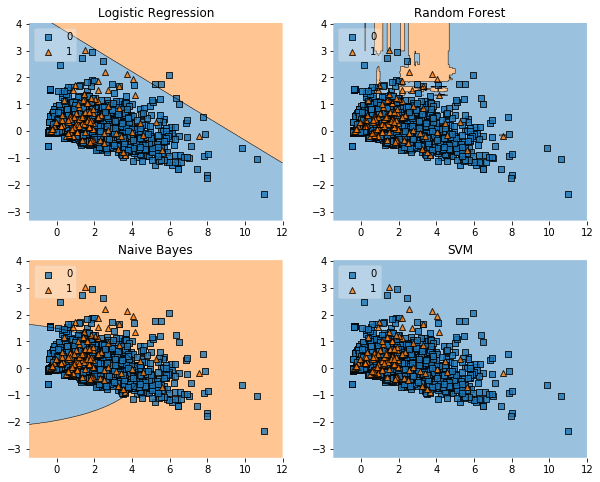

In [15]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    Trained_model=clf.fit(pca_2d,npa1)
    pred_data = Trained_model.predict(pca_2d_test)
    print ("Classifier:", lab,"Accuracy:", accuracy_score(npa1_test, pred_data))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=pca_2d, y=npa1, clf=clf, legend=2)
    plt.title(lab)
plt.show()